In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import os
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.shape

(150, 6)

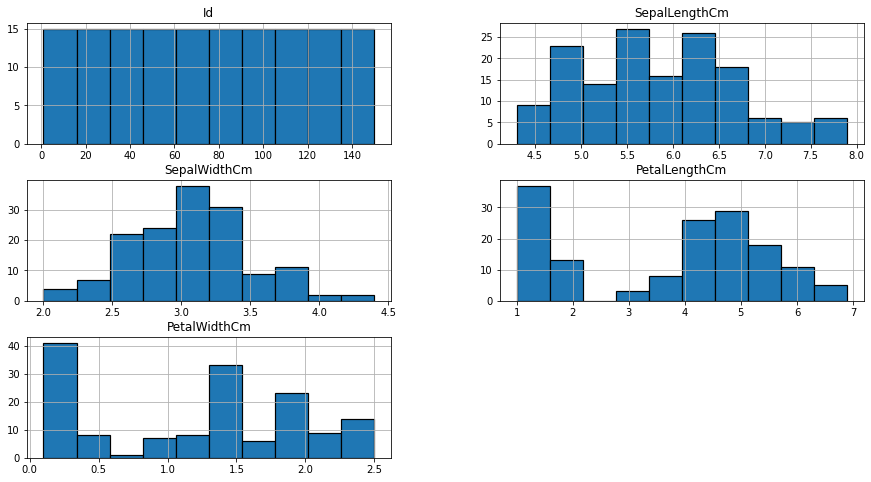

In [6]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [7]:
iris.shape

(150, 6)

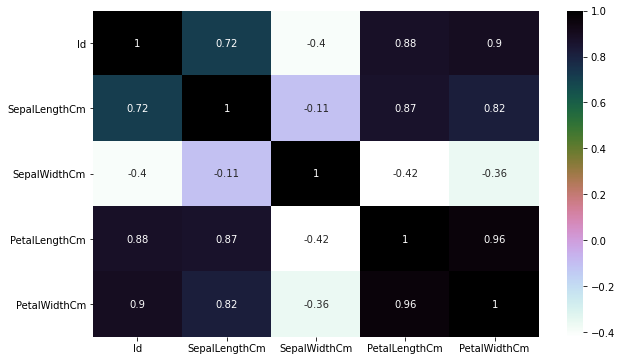

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') 
plt.show()

In [9]:
train, test = train_test_split(iris, test_size=0.3) 


In [10]:
train.shape

(105, 6)

In [11]:
test.shape

(45, 6)

In [12]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
train_y = train.Species 

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
test_y = test.Species 

In [13]:
train_X.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
135,7.7,3.0,6.1,2.3
98,5.1,2.5,3.0,1.1
117,7.7,3.8,6.7,2.2
95,5.7,3.0,4.2,1.2


In [14]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
94,5.6,2.7,4.2,1.3
147,6.5,3.0,5.2,2.0
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
80,5.5,2.4,3.8,1.1


In [15]:
train_y.head()

22         Iris-setosa
135     Iris-virginica
98     Iris-versicolor
117     Iris-virginica
95     Iris-versicolor
Name: Species, dtype: object

In [16]:
feature_cols = ['sepal_length' ,'sepal_width',  'petal_length',  'petal_width']


In [17]:
model = DecisionTreeClassifier()

model.fit(train_X,train_y)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(test_X)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [19]:
print("Accuracy:",(metrics.accuracy_score(test_y, y_pred))*100 , "%")


Accuracy: 88.88888888888889 %


In [20]:
dot_data = StringIO()

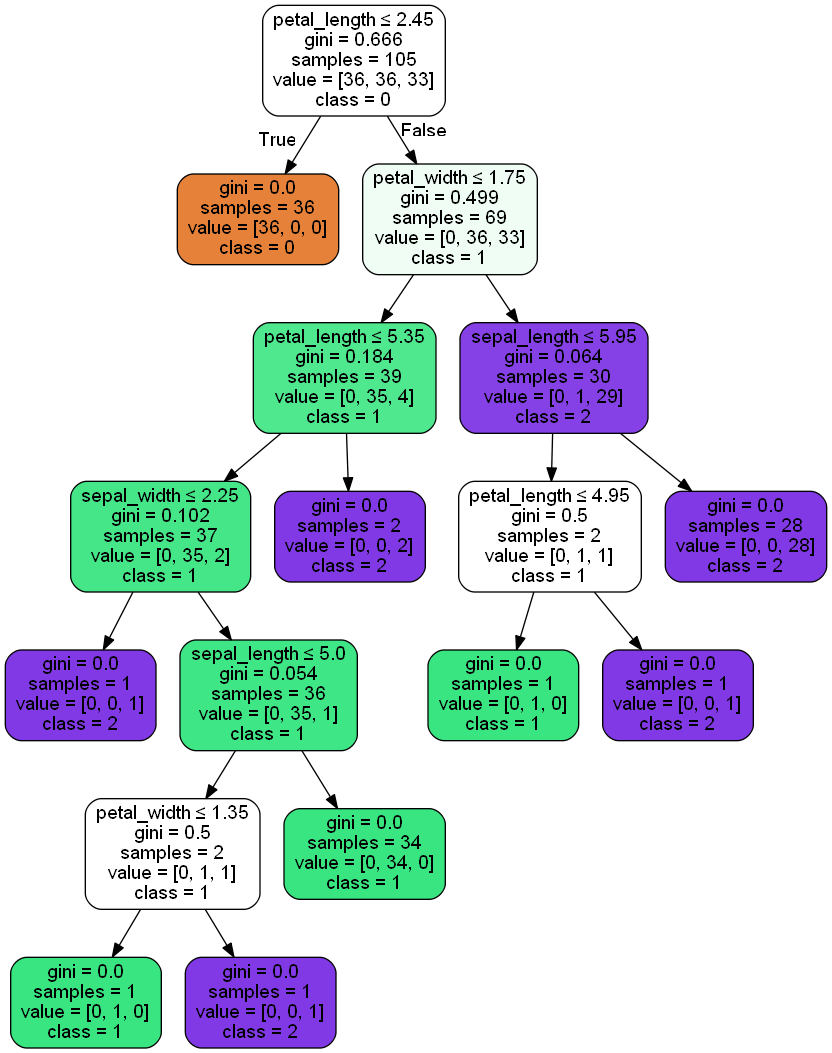

In [21]:
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris-classification.png')
Image(graph.create_png())